<H1>Introduction</h1>

<H3>Importing all the required tools and Reading the dataset</H3>

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sales_df   =    pd.read_csv('Sales_Data.csv')

<H3>This is How the Dataset Looks like</H3>

In [30]:
sales_df

,Date,Product Name,Product Quantity,Units sold,Day,Month,Year,DayOfWeek,Category,DayType,Week_of_Year,Rainfall
0,2022-01-02,AMBEWELA SET YOGHURT,80ML,6,2,1,2022,Sunday,YOGHURT,Weekend,52,7.6
1,2022-01-01,AMBEWELA SET YOGHURT,80ML,6,1,1,2022,Saturday,YOGHURT,Weekend,52,0.1
2,2022-01-01,AMBEWELA SET YOGHURT,80ML,1,1,1,2022,Saturday,YOGHURT,Weekend,52,0.1
3,2022-01-01,AMBEWELA SET YOGHURT,80ML,6,1,1,2022,Saturday,YOGHURT,Weekend,52,0.1
4,2022-01-02,AMBEWELA SET YOGHURT,80ML,10,2,1,2022,Sunday,YOGHURT,Weekend,52,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...
34154,2023-10-09,HIGHLAND YOGHURT,80ML,12,9,10,2023,Monday,YOGHURT,Weekday,41,0.0
34155,2023-10-09,HIGHLAND YOGHURT,80ML,9,9,10,2023,Monday,YOGHURT,Weekday,41,0.0
34156,2023-10-09,HIGHLAND YOGHURT,80ML,13,9,10,2023,Monday,YOGHURT,Weekday,41,0.0
34157,2023-10-09,HIGHLAND YOGHURT,80ML,7,9,10,2023,Monday,YOGHURT,Weekday,41,0.0


<H3>Quick overview</H3>

In [31]:
sales_df.isnull().sum()

Date                0
Product Name        0
Product Quantity    0
Units sold          0
Day                 0
Month               0
Year                0
DayOfWeek           0
Category            0
DayType             0
Week_of_Year        0
Rainfall            0
dtype: int64

<h3>Renaming the Dataframe and double checking that there are no null values</h3>

In [33]:
df= sales_df
df.dropna(inplace=True)

<h3>QUICK EDA</h3>

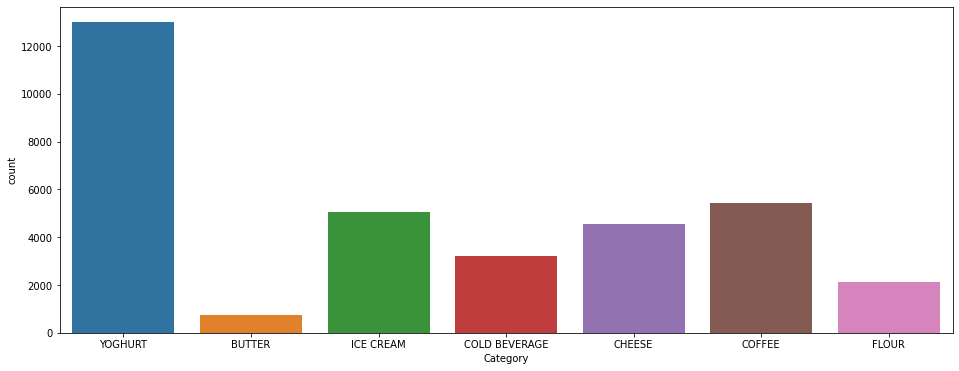

In [35]:
plt.figure(figsize=(16,6))
sns.countplot(x='Category', data=df)
plt.show()

Plot shows the comparison between the categry of products available

C:\Users\Hammaad\AppData\Local\Temp/ipykernel_18664/3094159044.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rainfall'].values.flatten(), kde=False)  # Use flatten to convert any potential multi-dimensional array


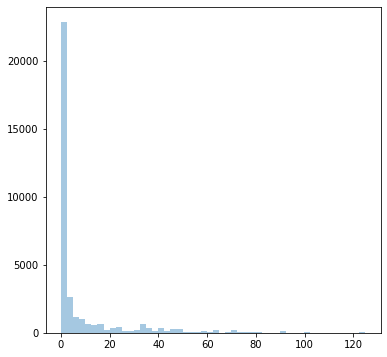

In [36]:
plt.figure(figsize=(6, 6))
sns.distplot(df['Rainfall'].values.flatten(), kde=False)  # Use flatten to convert any potential multi-dimensional array
plt.show()


Distribution of the rainfall along the dataset, many days had rainfall less than 12mm while there were server rainfalls till 100mm less frequently

<h1>Algorithm - Random Forrest Classifier Accuracy (37.5%)</h1> 

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Encode categorical features
df = sales_df
label_encoder = LabelEncoder()
df['DayOfWeek'] = label_encoder.fit_transform(df['DayOfWeek'])
df['DayType'] = label_encoder.fit_transform(df['DayType'])

# Define features (X) and target variable (y)
features = ['Day', 'Month', 'Year', 'DayOfWeek', 'DayType', 'Rainfall', 'Week_of_Year']
target = 'Category'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a RandomForestClassifier 
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display additional classification metrics
print(classification_report(y_test, y_pred))


Accuracy: 0.3706088992974239


c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

       BUTTER       0.00      0.00      0.00       225
       CHEESE       0.04      0.00      0.00      1332
       COFFEE       0.18      0.01      0.02      1667
COLD BEVERAGE       0.12      0.00      0.01       959
        FLOUR       0.00      0.00      0.00       653
    ICE CREAM       0.20      0.02      0.04      1550
      YOGHURT       0.38      0.97      0.54      3862

     accuracy                           0.37     10248
    macro avg       0.13      0.14      0.09     10248
 weighted avg       0.22      0.37      0.21     10248



c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy is 37% using Random forrest classifier with 60 - 30 Train test split

<h2>Tuning Hyper Parameters</h2>

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display additional classification metrics
print(classification_report(y_test, y_pred))

Accuracy: 0.3751463700234192


c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

       BUTTER       0.00      0.00      0.00       147
       CHEESE       0.00      0.00      0.00       876
       COFFEE       0.21      0.02      0.03      1095
COLD BEVERAGE       0.12      0.00      0.01       631
        FLOUR       0.00      0.00      0.00       416
    ICE CREAM       0.20      0.02      0.03      1056
      YOGHURT       0.38      0.97      0.55      2611

     accuracy                           0.38      6832
    macro avg       0.13      0.14      0.09      6832
 weighted avg       0.22      0.38      0.22      6832



c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy is 37% using Random forrest classifier with 80 - 20 Train test split

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display additional classification metrics
print(classification_report(y_test, y_pred))

Accuracy: 0.3754391100702576


c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

       BUTTER       0.00      0.00      0.00       147
       CHEESE       0.00      0.00      0.00       876
       COFFEE       0.21      0.02      0.03      1095
COLD BEVERAGE       0.00      0.00      0.00       631
        FLOUR       0.00      0.00      0.00       416
    ICE CREAM       0.20      0.02      0.03      1056
      YOGHURT       0.38      0.97      0.55      2611

     accuracy                           0.38      6832
    macro avg       0.11      0.14      0.09      6832
 weighted avg       0.21      0.38      0.22      6832



c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy is improving at a negligible rate after doubling the no of descion trees

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display additional classification metrics
print(classification_report(y_test, y_pred))

Accuracy: 0.3744145199063232


c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

       BUTTER       0.00      0.00      0.00       147
       CHEESE       0.00      0.00      0.00       876
       COFFEE       0.19      0.02      0.03      1095
COLD BEVERAGE       0.12      0.00      0.01       631
        FLOUR       0.00      0.00      0.00       416
    ICE CREAM       0.19      0.02      0.03      1056
      YOGHURT       0.38      0.96      0.55      2611

     accuracy                           0.37      6832
    macro avg       0.13      0.14      0.09      6832
 weighted avg       0.22      0.37      0.22      6832



c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy isnt affected significantly after tuning the no of decision trees used in the algorithm therefore all the possible hyper parameters are tuned therefore We should try another alogorithm

<h1>Algorithm - xGBoost Classifier Accuracy</h1>

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset
# Assuming 'df' is your DataFrame
# Make sure 'Category' column has the categorical labels

# Encode categorical features
label_encoder = LabelEncoder()
df['DayOfWeek'] = label_encoder.fit_transform(df['DayOfWeek'])
df['DayType'] = label_encoder.fit_transform(df['DayType'])

# Encode the categorical target variable
df['Category'] = label_encoder.fit_transform(df['Category'])

# Define features (X) and target variable (y)
features = ['Day', 'Month', 'Year', 'DayOfWeek', 'DayType', 'Rainfall', 'Week_of_Year']
target = 'Category'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBClassifier
clf = XGBClassifier(objective='multi:softmax', random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Decode the predictions back to original labels if needed
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display additional classification metrics
print(classification_report(y_test, y_pred))


Accuracy: 0.37719555035128804
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       147
           1       0.00      0.00      0.00       876
           2       0.24      0.01      0.02      1095
           3       0.00      0.00      0.00       631
           4       0.00      0.00      0.00       416
           5       0.19      0.02      0.03      1056
           6       0.38      0.98      0.55      2611

    accuracy                           0.38      6832
   macro avg       0.12      0.14      0.09      6832
weighted avg       0.21      0.38      0.22      6832



c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Accuracy is 37% without tuning hyper parameters

<h2>Tuning Hyper Parameters</h2>

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBClassifier
clf = XGBClassifier(objective='multi:softmax', random_state=42, learning_rate=0.1)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Decode the predictions back to original labels if needed
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display additional classification metrics
print(classification_report(y_test, y_pred))


Accuracy: 0.37983021077283374
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       147
           1       0.00      0.00      0.00       876
           2       0.43      0.00      0.01      1095
           3       0.00      0.00      0.00       631
           4       0.00      0.00      0.00       416
           5       0.11      0.00      0.01      1056
           6       0.38      0.99      0.55      2611

    accuracy                           0.38      6832
   macro avg       0.13      0.14      0.08      6832
weighted avg       0.23      0.38      0.21      6832



c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Using the golden triple values for the leaning rate. 37.9% after 0.1 learning rate

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBClassifier
clf = XGBClassifier(objective='multi:softmax', random_state=42, learning_rate=0.03)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Decode the predictions back to original labels if needed
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display additional classification metrics
print(classification_report(y_test, y_pred))


Accuracy: 0.38129391100702575
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       147
           1       0.00      0.00      0.00       876
           2       0.00      0.00      0.00      1095
           3       0.00      0.00      0.00       631
           4       0.00      0.00      0.00       416
           5       0.15      0.00      0.00      1056
           6       0.38      1.00      0.55      2611

    accuracy                           0.38      6832
   macro avg       0.08      0.14      0.08      6832
weighted avg       0.17      0.38      0.21      6832



c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Accuracy increased to 38% after lowering the learning rate

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBClassifier
clf = XGBClassifier(objective='multi:softmax', random_state=42, learning_rate=0.001, n_estimators=1000, max_depth=5)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Decode the predictions back to original labels if needed
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display additional classification metrics
print(classification_report(y_test, y_pred))


Accuracy: 0.382172131147541
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       147
           1       0.00      0.00      0.00       876
           2       0.00      0.00      0.00      1095
           3       0.00      0.00      0.00       631
           4       0.00      0.00      0.00       416
           5       0.00      0.00      0.00      1056
           6       0.38      1.00      0.55      2611

    accuracy                           0.38      6832
   macro avg       0.05      0.14      0.08      6832
weighted avg       0.15      0.38      0.21      6832



c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hammaad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Accuracy increased to 38.2% after lowering the learning rate and adding more decision trees